# Installing the necessary Libraries and Data

In [1]:
!pip install hdbscan

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pr
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import hdbscan
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/content/drive/MyDrive/DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv',sep=';')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


# Understanding the Data

In [4]:
data.shape

(740, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [6]:
data.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [7]:
data[data.duplicated()].shape[0]

34

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [9]:
def outlier(column):
  q1=np.quantile(data[column],0.25)
  q3=np.quantile(data[column],0.75)
  iqr=q3-q1
  uf=q3+(1.5 * iqr)
  lf=q1-(1.5 * iqr)
  outliers = [i for i in data[column] if (i > uf) | (i < lf)]
  print(f'Column : {column} \t Outliers : {len(outliers)}')

In [10]:
for j in data.columns:
  outlier(j)

Column : ID 	 Outliers : 0
Column : Reason for absence 	 Outliers : 0
Column : Month of absence 	 Outliers : 0
Column : Day of the week 	 Outliers : 0
Column : Seasons 	 Outliers : 0
Column : Transportation expense 	 Outliers : 3
Column : Distance from Residence to Work 	 Outliers : 0
Column : Service time 	 Outliers : 5
Column : Age 	 Outliers : 8
Column : Work load Average/day  	 Outliers : 32
Column : Hit target 	 Outliers : 19
Column : Disciplinary failure 	 Outliers : 40
Column : Education 	 Outliers : 129
Column : Son 	 Outliers : 0
Column : Social drinker 	 Outliers : 0
Column : Social smoker 	 Outliers : 54
Column : Pet 	 Outliers : 46
Column : Weight 	 Outliers : 0
Column : Height 	 Outliers : 119
Column : Body mass index 	 Outliers : 0
Column : Absenteeism time in hours 	 Outliers : 44


**Since the number of outliers in certain columns are too high considering the size of data, we will not remove them but use an algorithm that can handle outliers.**

# Cleaning the data

Removing Duplicates

In [11]:
df=data.copy()
df.drop_duplicates(keep='first',inplace=True)
print('Shape of original dataframe : ',data.shape)
print('Shape of dataframe after removing duplicates : ',df.shape)

Shape of original dataframe :  (740, 21)
Shape of dataframe after removing duplicates :  (706, 21)


In [12]:
df.drop('ID',axis=1,inplace=True) # Removing ID Column
df.shape

(706, 20)

# Exploratory Data Analysis (EDA)

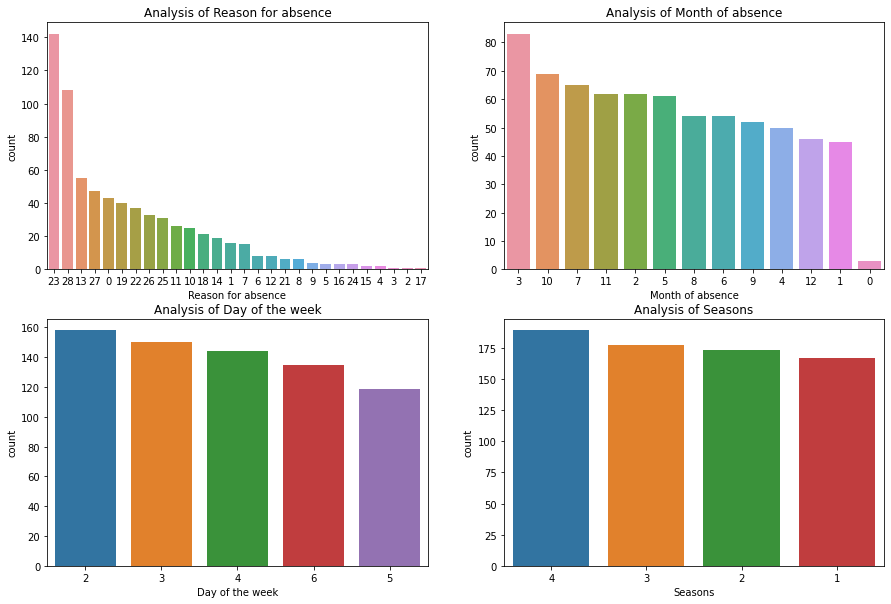

In [13]:
columns=['Reason for absence','Month of absence','Day of the week','Seasons']
plt.subplots(2,2,figsize=(15,10))
for i in range(4):
  plt.subplot(2,2,i+1)
  sns.countplot(df[columns[i]],order=df[columns[i]].value_counts().index)
  plt.title(f'Analysis of {columns[i]}')
plt.show()

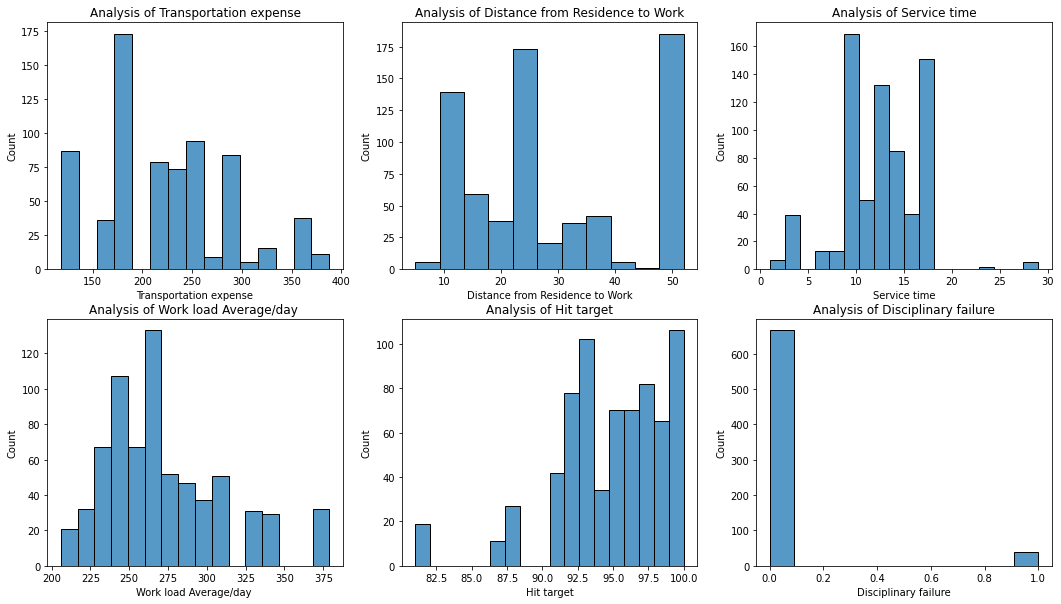

In [14]:
columns=['Transportation expense','Distance from Residence to Work','Service time','Work load Average/day ','Hit target','Disciplinary failure']
plt.subplots(2,3,figsize=(18,10))
for i in range(6):
  plt.subplot(2,3,i+1)
  sns.histplot(df[columns[i]])
  plt.title(f'Analysis of {columns[i]}')
plt.show()

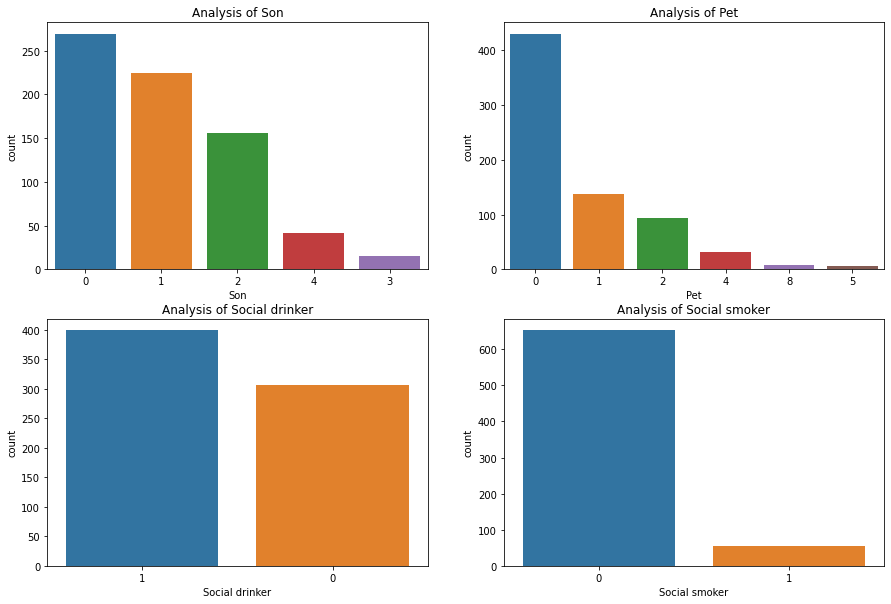

In [15]:
columns=['Son','Pet','Social drinker','Social smoker']
plt.subplots(2,2,figsize=(15,10))
for i in range(4):
  plt.subplot(2,2,i+1)
  sns.countplot(df[columns[i]],order=df[columns[i]].value_counts().index)
  plt.title(f'Analysis of {columns[i]}')
plt.show()

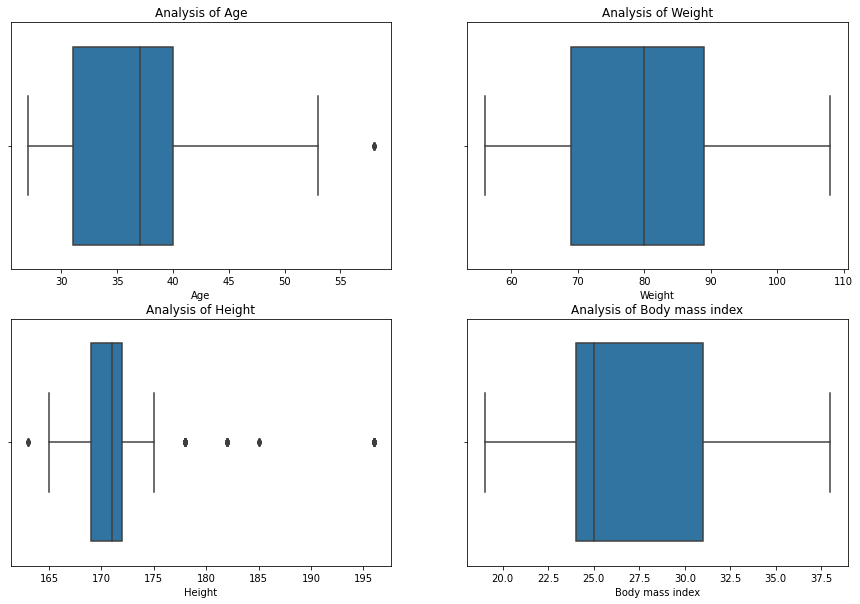

In [16]:
columns=['Age','Weight','Height','Body mass index']
plt.subplots(2,2,figsize=(15,10))
for i in range(4):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[columns[i]])
  plt.title(f'Analysis of {columns[i]}')
plt.show()

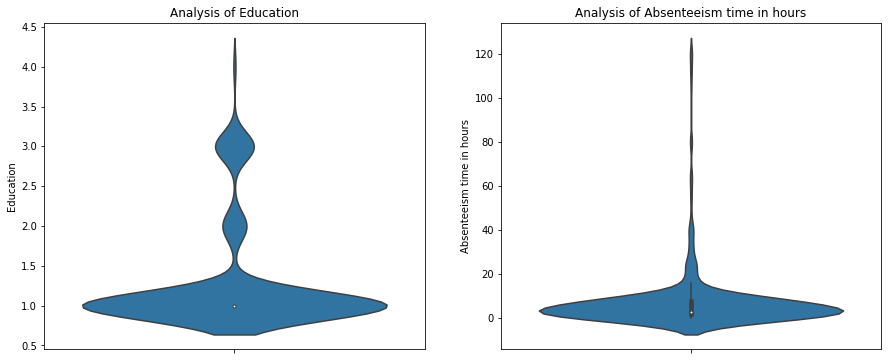

In [17]:
columns=['Education','Absenteeism time in hours']
plt.subplots(1,2,figsize=(15,6))
for i in range(2):
  plt.subplot(1,2,i+1)
  sns.violinplot(y=df[columns[i]])
  plt.title(f'Analysis of {columns[i]}')
plt.show()

There are high number of outliers in Education and Absenteeism in time features.

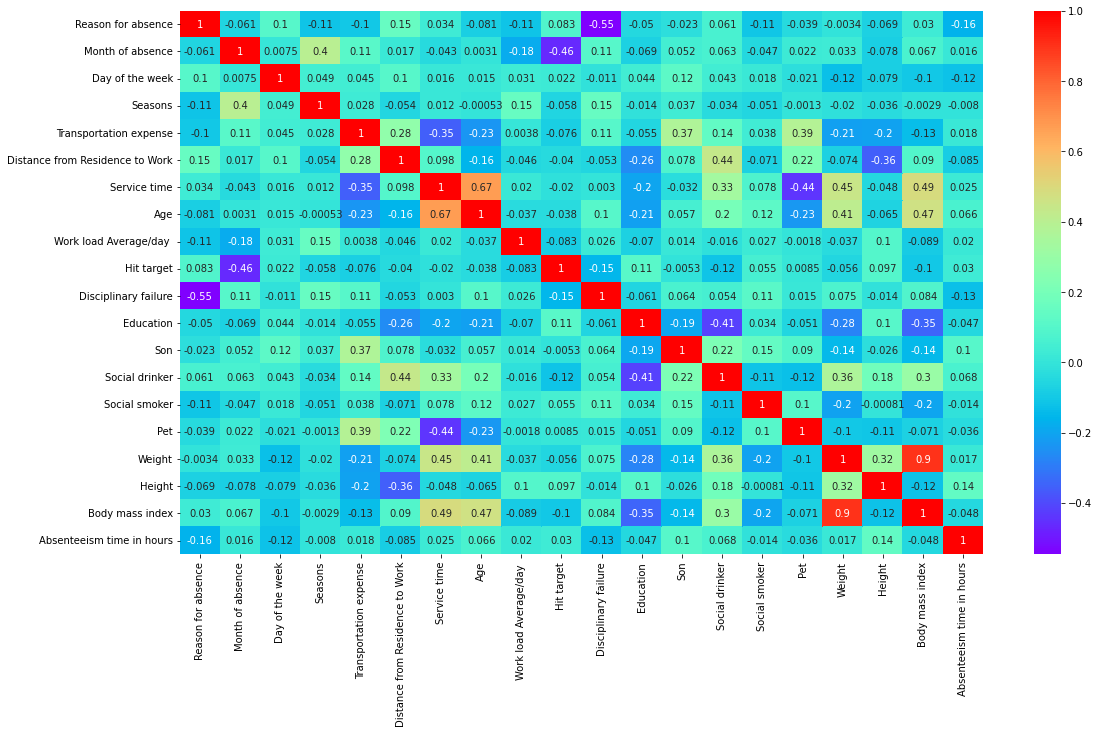

In [18]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),cmap='rainbow',annot=True);

**There are not many features with high correlation, so feature selection would be difficult.**

# Data Preprocessing

In [20]:
df[df.columns]=pr.MinMaxScaler().fit_transform(df[df.columns])
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.928571,0.583333,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333
1,0.000000,0.583333,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000
2,0.821429,0.583333,0.50,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667
3,0.250000,0.583333,0.75,0.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333
4,0.821429,0.583333,0.75,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667


In [22]:
pca=PCA()
df_pca=pca.fit_transform(df)

In [23]:
pca.explained_variance_ratio_

array([2.18154223e-01, 1.21105259e-01, 1.12468662e-01, 8.67378019e-02,
       7.82496648e-02, 5.80540206e-02, 5.42334043e-02, 4.99813581e-02,
       4.36797552e-02, 3.47187089e-02, 3.10393429e-02, 2.35099400e-02,
       2.14912676e-02, 1.98180006e-02, 1.32698423e-02, 1.24148688e-02,
       9.96501504e-03, 7.05559248e-03, 3.95159469e-03, 1.01678431e-04])

In [24]:
sc=df_pca[:,0:2]
PC_1 = sc[:,0]
PC_2 = sc[:,1]

In [25]:
tsne=TSNE()
df_tsne=tsne.fit_transform(df)

In [26]:
df_tsne.shape

(706, 2)

In [27]:
df_subset=pd.DataFrame()
df_subset['tsne-one'] = df_tsne[:,0]
df_subset['tsne-two'] = df_tsne[:,1]

# Data Mining

In [28]:
def pca_plot(model,clus):
  plt.figure(figsize=(14,8))
  sns.scatterplot(PC_1, PC_2, hue=clus,palette='rainbow',alpha=0.7,legend='full')
  plt.title(f'Clustered using {model} and PCA Dimensionality Reduction')
  plt.show()

In [29]:
def tsne_plot(model,clus):
  plt.figure(figsize=(14,8))
  sns.scatterplot(x='tsne-one', y='tsne-two', hue=clus, palette='rainbow',data=df_subset,legend='full',alpha=0.7)
  plt.title(f'Clustered using {model} and tSNE Dimensionality Reduction')
  plt.show()

In [30]:
df_plot=pd.DataFrame()

In [31]:
score=[]

## KMeans

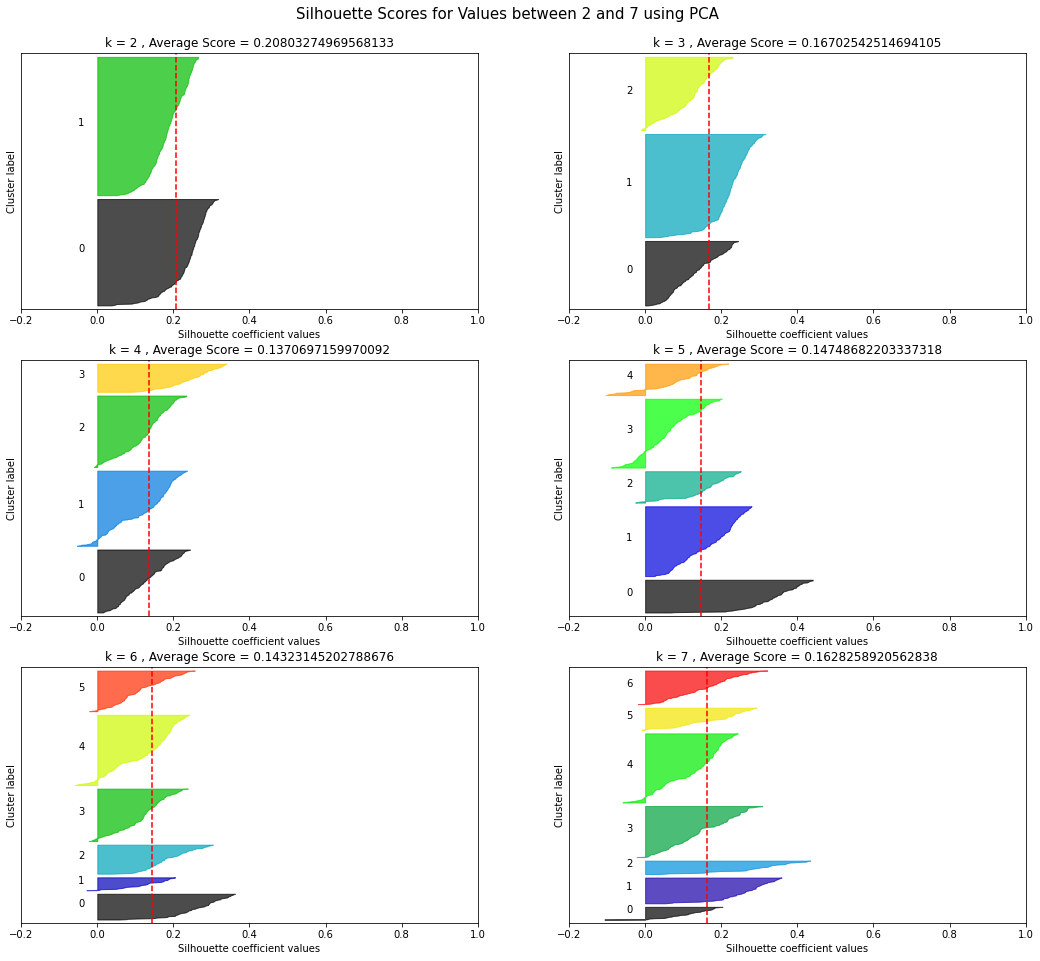

In [32]:
c=1
fig, ax = plt.subplots(3,2,figsize=(18,16))
for i in range(2,8):
    model = KMeans(n_clusters=i, random_state=10)
    labels = model.fit_predict(df_pca)

    sil_avg = silhouette_score(df_pca, labels)
    #print(f'For cluster = {i}, average silhouette_score is : {sil_avg}')
    
    sample_sil_values = silhouette_samples(df_pca, labels)

    y_lower = 10
    
    plt.subplot(3,2,c)
    plt.xlim([-0.2, 1])
    plt.ylim([0, len(df_pca) + (i + 1) * 10])
    
    for j in range(i):
        sil_values_j = sample_sil_values[labels == j]

        sil_values_j.sort()

        size_j = sil_values_j.shape[0]
        y_upper = y_lower + size_j

        color = cm.nipy_spectral(float(j) / i)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, sil_values_j, facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_j, str(j))

        y_lower = y_upper + 10

    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=sil_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.xticks([-0.2,0,0.2,0.4,0.6,0.8,1])
    plt.title(f'k = {i} , Average Score = {sil_avg}')
    c=c+1
plt.suptitle('Silhouette Scores for Values between 2 and 7 using PCA',x=0.5,y=0.92,size=15)
plt.show()

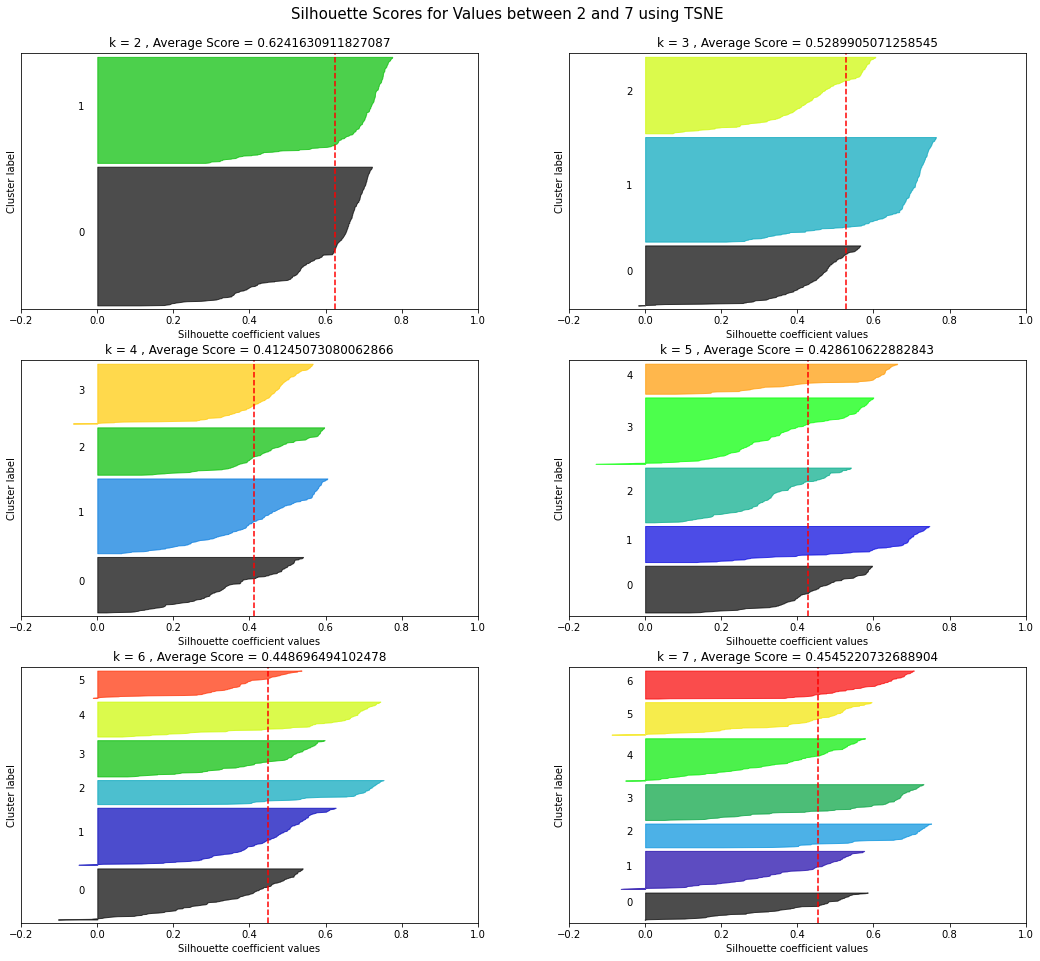

In [33]:
c=1
fig, ax = plt.subplots(3,2,figsize=(18,16))
for i in range(2,8):
    model = KMeans(n_clusters=i, random_state=10)
    labels = model.fit_predict(df_tsne)

    sil_avg = silhouette_score(df_tsne, labels)
    #print(f'For cluster = {i}, average silhouette_score is : {sil_avg}')
    
    sample_sil_values = silhouette_samples(df_tsne, labels)

    y_lower = 10
    
    plt.subplot(3,2,c)
    plt.xlim([-0.2, 1])
    plt.ylim([0, len(df_tsne) + (i + 1) * 10])
    
    for j in range(i):
        sil_values_j = sample_sil_values[labels == j]

        sil_values_j.sort()

        size_j = sil_values_j.shape[0]
        y_upper = y_lower + size_j

        color = cm.nipy_spectral(float(j) / i)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, sil_values_j, facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_j, str(j))

        y_lower = y_upper + 10

    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=sil_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.xticks([-0.2,0,0.2,0.4,0.6,0.8,1])
    plt.title(f'k = {i} , Average Score = {sil_avg}')
    c=c+1
plt.suptitle('Silhouette Scores for Values between 2 and 7 using TSNE',x=0.5,y=0.92,size=15)
plt.show()

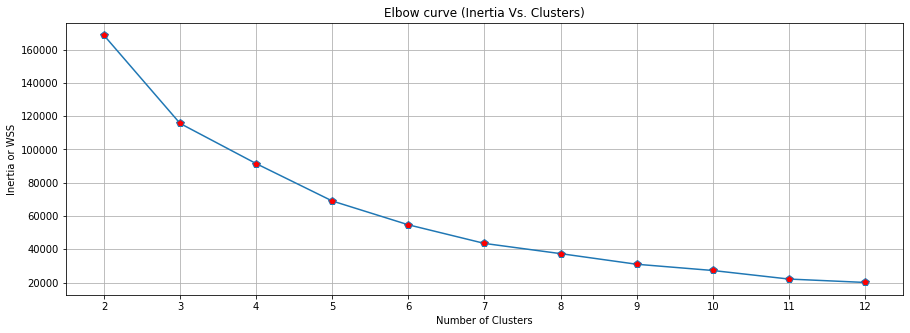

In [34]:
inertia = []
for k in range(2, 13):
    kmean = KMeans(n_clusters=k)
    kmean.fit(df_tsne)
    inertia.append(kmean.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 13), inertia, marker='p',markersize=8,mfc='red')
plt.grid(True)
plt.xticks(range(2,13))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia or WSS')
plt.title('Elbow curve (Inertia Vs. Clusters)')
plt.show()

In [35]:
kmean=KMeans(n_clusters=3)

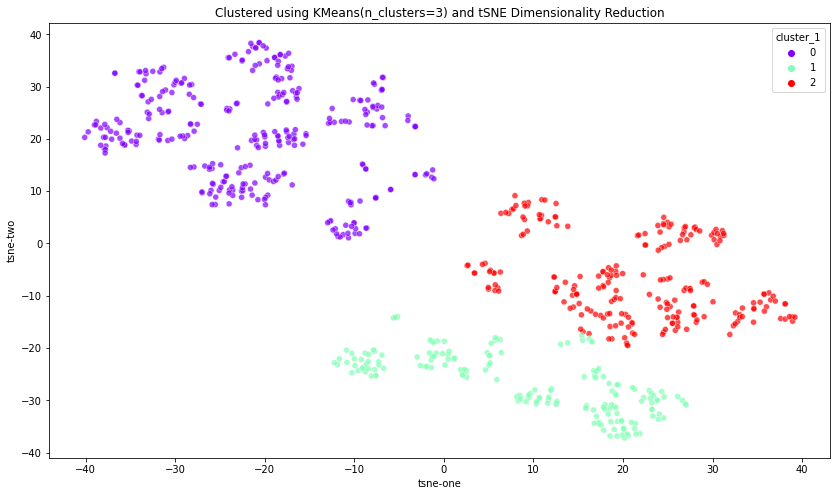

In [36]:
kmean.fit_predict(df_tsne)
df_plot['cluster_1']=kmean.labels_
tsne_plot(kmean,df_plot['cluster_1'])

In [37]:
score.append(silhouette_score(df_tsne, df_plot['cluster_1']))

## Hierarchial

In [38]:
def ac(clus,link):
  model = AgglomerativeClustering(n_clusters=clus, linkage = link)
  model = model.fit(df_tsne)
  df_plot['cluster_2'] = model.labels_
  y_pred=df_plot['cluster_2']
  plt.scatter(df_tsne[:,0], df_tsne[:,1], c=y_pred, cmap='Paired')
  plt.title('Hierarchical Clustering')
  plt.show()

In [39]:
interact_plot = widgets.interactive(ac, clus=widgets.IntSlider(min=2,max=6,step=1), link=['average','complete','ward','single'])
interact_plot

interactive(children=(IntSlider(value=2, description='clus', max=6, min=2), Dropdown(description='link', optio…

In [40]:
score.append(silhouette_score(df_tsne, df_plot['cluster_2']))

## HDBSCAN

In [41]:
hdb=hdbscan.HDBSCAN(min_cluster_size=20)

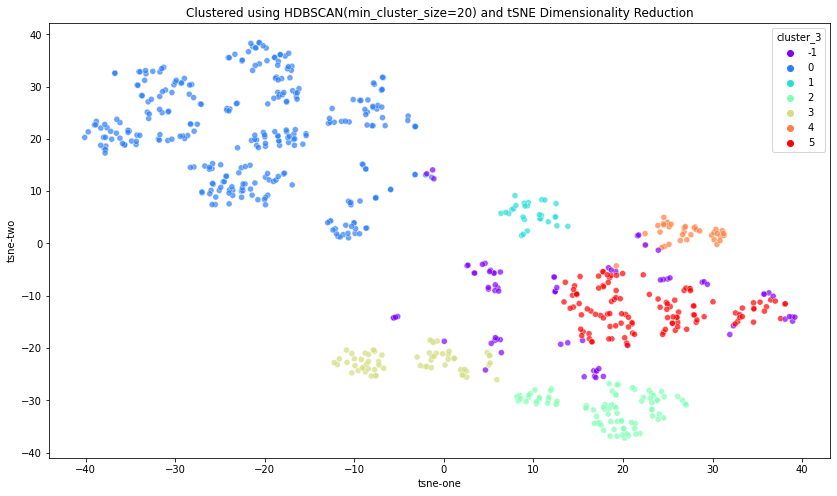

In [42]:
hdb.fit_predict(df_tsne)
df_plot['cluster_3']=hdb.labels_
tsne_plot(hdb,df_plot['cluster_3'])

In [45]:
score.append(silhouette_score(df_tsne, df_plot['cluster_3']))

# Compare all the Models

In [46]:
compare = pd.DataFrame(data=score,index=['KMeans','Hierarchial','HDBSCAN'],columns=['Silhouette_Score'])

In [47]:
compare

,Silhouette_Score
KMeans,0.528991
Hierarchial,0.529824
HDBSCAN,0.428391


**KMeans is the best model for our data.**



---



---

